# Harry Potter

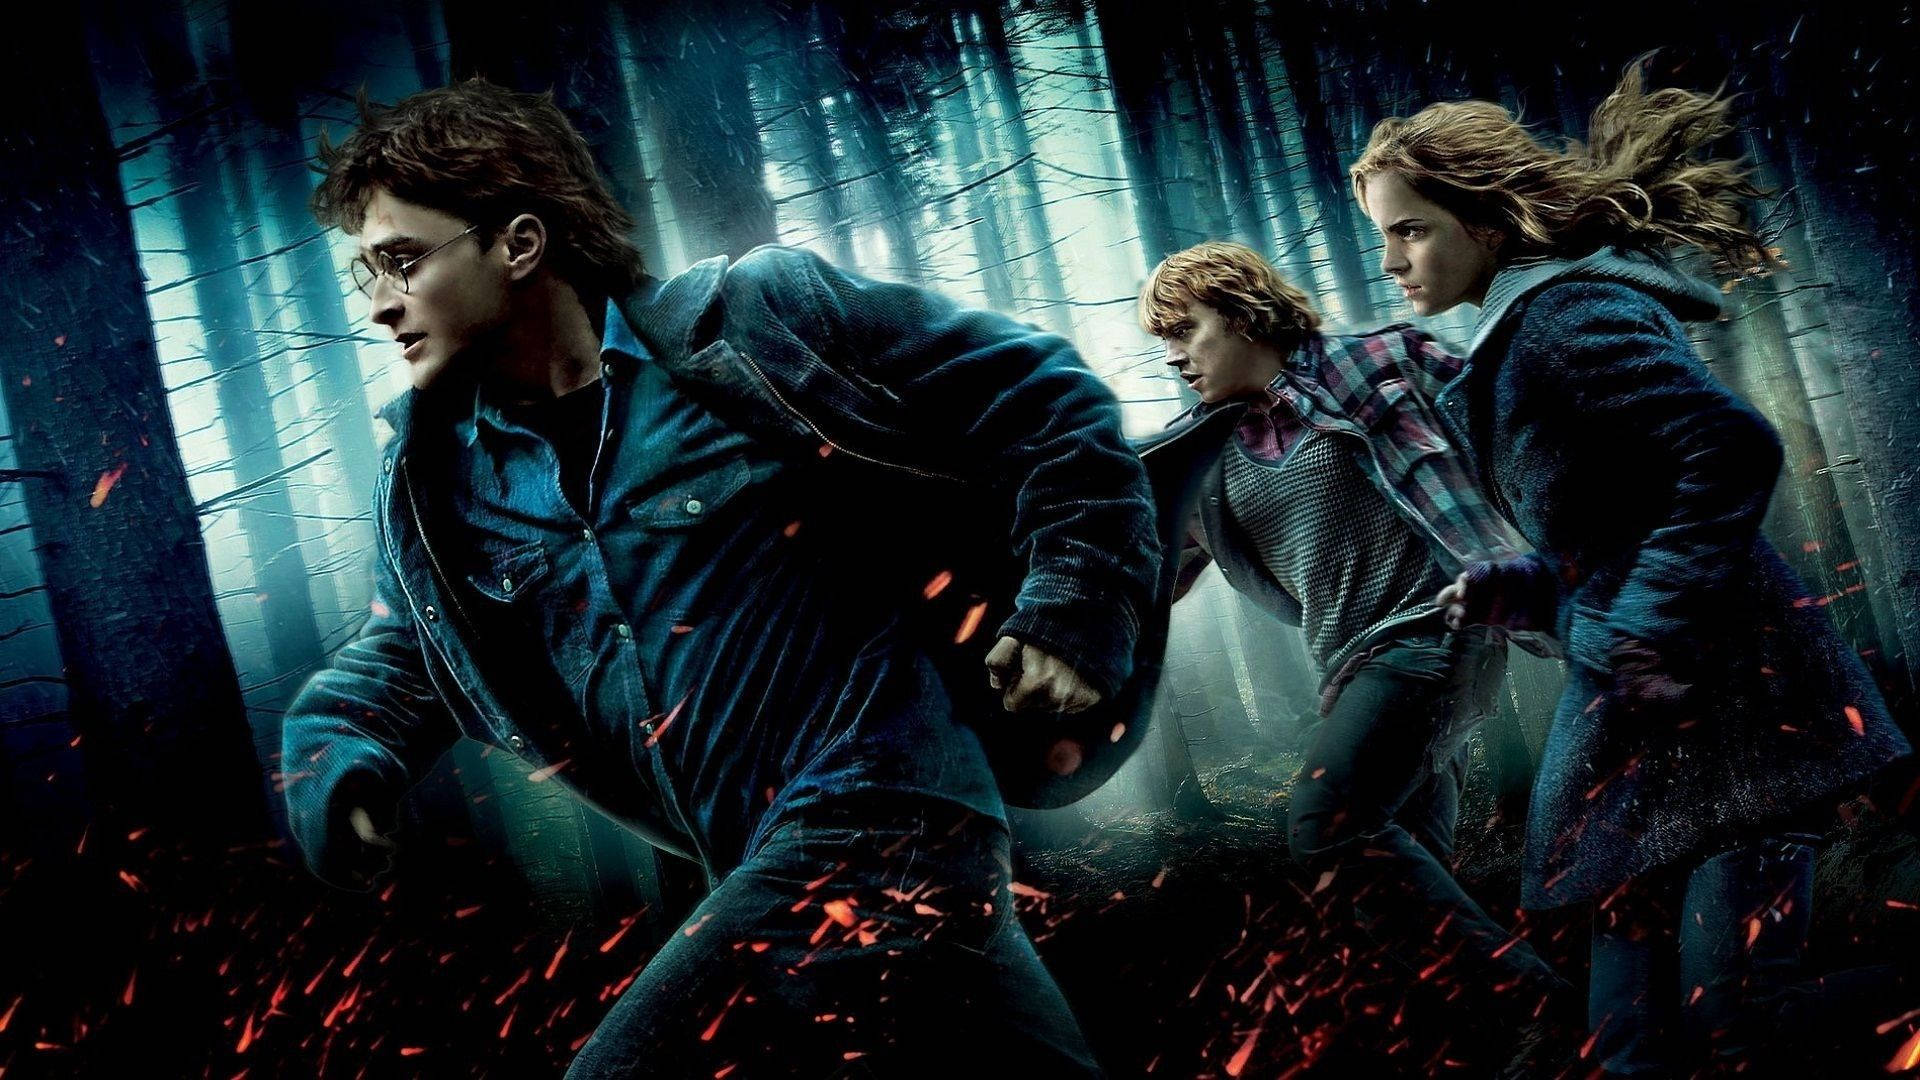

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/privatedata/harrypotter.pdf


# 1. Getting dataset

In [ ]:
harrypotter = "/kaggle/input/privatedata/harrypotter.pdf"

In [ ]:
!pip install pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 14.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 67.8 MB/s eta 0:00:00:00:0100:01


In [ ]:
import fitz  # PyMuPDF

def extract_text_from_pdf(pdf_path):
    # Open the PDF file
    pdf_document = fitz.open(pdf_path)

    # Initialize an empty string to hold the text
    full_text = ""

    # Iterate over each page in the PDF
    for page_num in range(len(pdf_document)):
        page = pdf_document.load_page(page_num)
        # Extract text from the page
        text = page.get_text()
        # Append the text to the full_text variable
        full_text += text + '\n'

    # Close the PDF document
    pdf_document.close()

    return full_text

# Path to the PDF file in Colab (assumes the file is uploaded to the session)
pdf_path = harrypotter

# Extract text and store in a variable
text = extract_text_from_pdf(pdf_path)

# Print the first 1000 characters of the extracted text to verify
print(text[:1000])







CONTENTS
Harry Potter and the Sorcerer’s Stone
Harry Potter and the Chamber of Secrets
Harry Potter and the Prisoner of Azkaban
Harry Potter and the Goblet of Fire
Harry Potter and the Order of the Phoenix
Harry Potter and the Half-Blood Prince
Harry Potter and the Deathly Hallows



 
FOR JESSICA, WHO LOVES STORIES,
FOR ANNE, WHO LOVED THEM TOO;
AND FOR DI, WHO HEARD THIS ONE FIRST.

 
CONTENTS
ONE
The Boy Who Lived
TWO
The Vanishing Glass
THREE
The Letters from No One
FOUR
The Keeper of the Keys
FIVE
Diagon Alley
SIX
The Journey from Platform Nine and Three-quarters
SEVEN
The Sorting Hat
EIGHT
The Potions Master
NINE
The Midnight Duel
TEN
Halloween
ELEVEN
Quidditch
TWELVE

The Mirror of Erised
THIRTEEN
Nicolas Flamel
FOURTEEN
Norbert the Norwegian Ridgeback
FIFTEEN
The Forbidden Forest
SIXTEEN
Through the Trapdoor
SEVENTEEN
The Man with Two Faces

M
 
CHAPTER  ONE
THE BOY WHO LIVED
r. and Mrs. Dursley, of number four, Privet Drive, were proud to say
that they were perfectly norm

In [ ]:
len(text)

6281301

In [ ]:
import torch
import math
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
device = "Cuda" if torch.cuda.is_available() else "cpu"
device

'Cuda'

# 2. Preparing data

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("GPT2")
tokenizer

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

GPT2TokenizerFast(name_or_path='GPT2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
}

In [ ]:
encoded_test = tokenizer.encode("Harry bhai", return_tensors="pt")
print(encoded_test.shape)
print(encoded_test.squeeze(0).shape)

torch.Size([1, 3])
torch.Size([3])


In [ ]:
tokenizer.vocab_size

50257

In [ ]:
# let's now encode the entire text dataset and store it into a torch.Tensor
data = torch.tensor(tokenizer.encode(text), dtype=torch.long)
print(data.shape, data.dtype)
print(data[:100])

Token indices sequence length is longer than the specified maximum sequence length for this model (1795561 > 1024). Running this sequence through the model will result in indexing errors


torch.Size([1795561]) torch.int64
tensor([  628,   628,   198, 37815, 15365,   198, 18308, 14179,   290,   262,
        30467,   447,   247,    82,  8026,   198, 18308, 14179,   290,   262,
        15840,   286, 23561,   198, 18308, 14179,   290,   262, 16999,   263,
          286,  7578,    74, 45094,   198, 18308, 14179,   290,   262, 16909,
         1616,   286,  3764,   198, 18308, 14179,   290,   262,  8284,   286,
          262,  9643,   198, 18308, 14179,   290,   262, 13139,    12, 21659,
         9005,   198, 18308, 14179,   290,   262,  5830,   306,  4789,  1666,
          628,   628,   220,   198, 13775,   449,  7597, 25241,    11, 19494,
          406,  8874,  1546, 46366, 11015,    11,   198, 13775,  3537, 12161,
           11, 19494,   406,  8874,  1961, 44788,  5390,    46,    26,   198])


In [ ]:
tokenizer.decode(data[:100])

'\n\n\n\n\nCONTENTS\nHarry Potter and the Sorcerer’s Stone\nHarry Potter and the Chamber of Secrets\nHarry Potter and the Prisoner of Azkaban\nHarry Potter and the Goblet of Fire\nHarry Potter and the Order of the Phoenix\nHarry Potter and the Half-Blood Prince\nHarry Potter and the Deathly Hallows\n\n\n\n \nFOR JESSICA, WHO LOVES STORIES,\nFOR ANNE, WHO LOVED THEM TOO;\n'

In [ ]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def create_blocks_with_labels(data, block_size):
    num_blocks = len(data) // block_size
    data = data[:num_blocks * block_size]  # Trim data to fit blocks

    # Create blocks
    blocks = data.view(-1, block_size)  # Reshape into (num_blocks, block_size)

    # Create labels by shifting blocks to the right
    labels = torch.roll(blocks, shifts=-1, dims=1)  # Shift right

    # Move to the device
    blocks = blocks.to(device)
    labels = labels.to(device)

    return blocks, labels

block_size = 256  # Set your desired block size
blocks, labels = create_blocks_with_labels(data, block_size)
print(f"Blocks shape: {blocks.shape}")
print(f"Labels shape: {labels.shape}")


Blocks shape: torch.Size([7013, 256])
Labels shape: torch.Size([7013, 256])


In [ ]:
from torch.utils.data import TensorDataset

test_dataset = TensorDataset(blocks, labels)

In [ ]:
from torch.utils.data import DataLoader

batch_size = 16 # Adjust based on your needs

dataloader = DataLoader(test_dataset, batch_size=batch_size, drop_last=True, shuffle=False)

# Example usage:
for batch in dataloader:
    inputs, targets = batch
    print(f"Inputs shape: {inputs}")  # Should be (batch_size, block_size)
    print(f"Targets shape: {targets}")  # Should be (batch_size, block_size)
    # Ensure inputs and targets are on the correct device
    print(f"Inputs device: {inputs.device}")
    print(f"Targets device: {targets.device}")
    break


Inputs shape: tensor([[  628,   628,   198,  ...,  1677,   198, 15046],
        [  262, 21914,  9424,  ...,  1043,   503,   546],
        [  262,  6902,  1010,  ...,  1588,    11,   256],
        ...,
        [  683,   290,  9074,  ...,    11,  7888,    11],
        [  198,   392,   845,  ...,   340,    13,   198],
        [  464, 16936,  4675,  ..., 17080,  4612,   306]], device='cuda:0')
Targets shape: tensor([[  628,   198, 37815,  ...,   198, 15046,   628],
        [21914,  9424,   198,  ...,   503,   546,   262],
        [ 6902,  1010,    13,  ...,    11,   256,   262],
        ...,
        [  290,  9074,    13,  ...,  7888,    11,   683],
        [  392,   845,  1468,  ...,    13,   198,   198],
        [16936,  4675, 20450,  ...,  4612,   306,   464]], device='cuda:0')
Inputs device: cuda:0
Targets device: cuda:0


In [ ]:
len(dataloader)

438

# 3. Building our Model

In [ ]:
class FeedForward(nn.Module):
    def __init__(self, embed_size, device, dropout=0.1):
        super(FeedForward, self).__init__()
        self.device = device
        self.fc1 = nn.Linear(embed_size, 4 * embed_size)  # Hidden size is 4x embed_size
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(4 * embed_size, embed_size)  # Output size is embed_size
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = x.to(self.device)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x


In [ ]:
# Self Attention!!
class SelfAttention(nn.Module):
  def __init__(self, device, embed_size, heads):
    super(SelfAttention, self).__init__()
    self.device = device
    self.embed_size = embed_size
    self.heads = heads
    self.head_dim = embed_size // heads

    assert (self.head_dim * heads == embed_size), "Embed size needs to be divisble by heads"

    self.values = nn.Linear(self.head_dim, self.head_dim, bias=False)
    self.keys = nn.Linear(self.head_dim, self.head_dim, bias=False)
    self.queries = nn.Linear(self.head_dim, self.head_dim, bias=False)
    self.fc_out = nn.Linear(heads*self.head_dim, embed_size)

  def forward(self, values, keys, query, mask):
    values = values.to(self.device)
    keys = keys.to(self.device)
    query = query.to(self.device)
    N = query.shape[0]
    value_len, key_len, query_len = values.shape[1], keys.shape[1], query.shape[1]

    # Split embedding into self.head pieces
    values = values.reshape(N, value_len, self.heads, self.head_dim)
    keys = keys.reshape(N, key_len, self.heads, self.head_dim)
    queries = query.reshape(N, query_len, self.heads, self.head_dim)

    values = self.values(values)
    keys = self.keys(keys)
    queries = self.queries(queries)

    energy = torch.einsum("nqhd,nkhd->nhqk", queries, keys)

    # queries shape: (N, query_len, heads, head_dim)
    # keys shape: (N, key_len, heads, heads_dim)
    # energy shape: (N, heads, query_len, key_len)

    if mask is not None:
      energy = energy.masked_fill(mask == 0, float("-1e20"))

    attention = torch.softmax(energy / (self.embed_size ** (1/2)), dim=3)

    out = torch.einsum("nhql, nlhd->nqhd", attention, values).reshape(
        N, query_len, self.heads*self.head_dim)

    # attention shape: (N, heads, query_len, key_len)
    # values shape: (N, value_len, heads, heads_dim)
    # after sinsum (N, query_len, heads, heads_dim) then flatten last two dimensions

    out = self.fc_out(out)
    return out


In [ ]:
class PositionEncoding(nn.Module):
  def __init__(self, embed_size: int, device, seq_len: int, dropout: float) -> None:
    super().__init__()
    self.device = device
    self.d_model = embed_size
    self.seq_len = seq_len
    self.dropout = nn.Dropout(dropout)

    # Create a matrix of shape (Seq_len, d_model)
    pe = torch.zeros(seq_len, embed_size)
    # Create a vector of shape
    position = torch.arange(0, seq_len, dtype=torch.float).unsqueeze(1) # (seq_len, 1)
    div_term = torch.exp(torch.arange(0,embed_size, 2).float() * (-math.log(10000.0) / embed_size))
    # Apply the sin to even positions
    pe[:, 0::2] = torch.sin(position * div_term)
    pe[:, 1::2] = torch.cos(position * div_term)

    pe = pe.unsqueeze(0) # (1, seq_len, d_model)
    self.register_buffer("pe", pe)

  def forward(self, x):
    x = x.to(self.device)
    x = x + (self.pe[:, :x.shape[1], :]).requires_grad_(False)
    return self.dropout(x)

In [ ]:
class DecoderModel(nn.Module):
    def __init__(self, vocab_size, device, embed_size: int, seq_len: int, heads: int, dropout=0.1):
        super().__init__()
        self.device = device
        self.we = nn.Embedding(vocab_size, embed_size)  # Embedding layer
        self.pe = PositionEncoding(embed_size=embed_size, seq_len=seq_len, device=device, dropout=dropout)  # Positional Encoding
        self.attention = SelfAttention(embed_size=embed_size, device=device, heads=heads)  # Self-Attention
        self.feedforward = FeedForward(embed_size=embed_size, device=device, dropout=dropout)  # FeedForward Network
        self.fc_layer = nn.Linear(in_features=embed_size, out_features=vocab_size)  # Final Linear Layer

        self.loss = nn.CrossEntropyLoss()  # Loss function

    def forward(self, token_ids):
        token_ids = token_ids.to(self.device)
        if token_ids.ndimension() == 1:
            token_ids = token_ids.unsqueeze(0)  # Add batch dimension if missing

        B, T = token_ids.shape  # B = batch size, T = sequence length

        # Word Embeddings
        word_embeddings = self.we(token_ids)
        # print(f"Word Embedding shape:\n{word_embeddings.shape}\n")
        # print(f"Word Embeddings are:\n{word_embeddings}\n")
        # Expected shape: [B, T, embed_size]

        # Positional Encoding
        pos_embeddings = self.pe(word_embeddings)
        # print(f"Pos_embedding shape is:\n{pos_embeddings.shape}\n")
        # print(f"Positional Embeddings are:\n{pos_embeddings}\n")
        # Expected shape: [B, T, embed_size]

        # Mask for Self-Attention
        mask = torch.tril(torch.ones((seq_len, seq_len))).view(1, 1, seq_len, seq_len).to(self.device)
        mask = mask[:, :, :T, :T] == 0
        # print(f"Mask shape is:\n{mask.shape}\n")
        # print(f"Mask is:\n{mask}\n")
        # Expected shape: [1, 1, T, T] (where T is the sequence length, should match the input sequence length)

        # Self-Attention Output
        self_attention_values = self.attention(pos_embeddings,
                                               pos_embeddings,
                                               pos_embeddings,
                                               mask=mask)
        # print(f"Self attention shape is:\n{self_attention_values.shape}\n")
        # print(f"Self Attention Values are:\n{self_attention_values}\n")
        # Expected shape: [B, T, embed_size]

        # Residual Connection
        residual_connection_values = pos_embeddings + self_attention_values
        # print(f"Residual Connection shape is:\n{residual_connection_values.shape}\n")
        # print(f"Residual Connection Values are:\n{residual_connection_values}\n")
        # Expected shape: [B, T, embed_size]

        # Feedforward Network
        feedforward_output = self.feedforward(residual_connection_values)
        # print(f"Feedforward Output shape is:\n{feedforward_output.shape}\n")
        # print(f"Feedforward Output is:\n{feedforward_output}\n")
        # Expected shape: [B, T, embed_size]

        # Final Linear Layer
        fc_layer_output = self.fc_layer(feedforward_output)
        # print(f"FC Layer Output shape is:\n{fc_layer_output.shape}\n")
        # print(f"FC Layer Output is:\n{fc_layer_output}\n")
        # Expected shape: [B, T, vocab_size]

        return fc_layer_output

# 4. Train the Model

In [ ]:
# params
vocab_size = tokenizer.vocab_size
embed_size = 512
seq_len = 256
heads = 4
dropout = 0.1

# Initialize the model
harrypotter = DecoderModel(vocab_size=vocab_size, embed_size=embed_size, device=device, seq_len=seq_len, heads=heads, dropout=dropout).to(device)
print(harrypotter)

DecoderModel(
  (we): Embedding(50257, 512)
  (pe): PositionEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (attention): SelfAttention(
    (values): Linear(in_features=128, out_features=128, bias=False)
    (keys): Linear(in_features=128, out_features=128, bias=False)
    (queries): Linear(in_features=128, out_features=128, bias=False)
    (fc_out): Linear(in_features=512, out_features=512, bias=True)
  )
  (feedforward): FeedForward(
    (fc1): Linear(in_features=512, out_features=2048, bias=True)
    (relu): ReLU()
    (fc2): Linear(in_features=2048, out_features=512, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (fc_layer): Linear(in_features=512, out_features=50257, bias=True)
  (loss): CrossEntropyLoss()
)


In [ ]:
from tqdm.auto import tqdm

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(harrypotter.parameters(), lr=0.001)

EPOCH = 3
for epoch in range(EPOCH):
  train_loss = 0
  harrypotter.train()

  for batch in dataloader:
    inputs, targets = batch
    optimizer.zero_grad()
    outputs = harrypotter(inputs)
    loss = loss_fn(outputs.view(-1, vocab_size), targets.view(-1))
    loss.backward()
    optimizer.step()
    train_loss += loss.item()

  train_loss /= len(dataloader)
  print(f"Epoch {epoch+1}/{EPOCH}, Train Loss: {train_loss:.4f}")

Epoch 1/3, Train Loss: 3.9547
Epoch 2/3, Train Loss: 1.4021
Epoch 3/3, Train Loss: 0.5612


# 5. Test the model

In [ ]:
# params
vocab_size = tokenizer.vocab_size
embed_size = 512
seq_len = 256
heads = 4
dropout = 0

# Initialize the model
harrypotter = DecoderModel(vocab_size=vocab_size, embed_size=embed_size, device=device, seq_len=seq_len, heads=heads, dropout=dropout).to(device)
print(harrypotter)

DecoderModel(
  (we): Embedding(50257, 512)
  (pe): PositionEncoding(
    (dropout): Dropout(p=0, inplace=False)
  )
  (attention): SelfAttention(
    (values): Linear(in_features=128, out_features=128, bias=False)
    (keys): Linear(in_features=128, out_features=128, bias=False)
    (queries): Linear(in_features=128, out_features=128, bias=False)
    (fc_out): Linear(in_features=512, out_features=512, bias=True)
  )
  (feedforward): FeedForward(
    (fc1): Linear(in_features=512, out_features=2048, bias=True)
    (relu): ReLU()
    (fc2): Linear(in_features=2048, out_features=512, bias=True)
    (dropout): Dropout(p=0, inplace=False)
  )
  (fc_layer): Linear(in_features=512, out_features=50257, bias=True)
  (loss): CrossEntropyLoss()
)


In [ ]:
text= """harry potter"""

In [ ]:
import torch
import torch.nn.functional as F

input_text = text
model_input = torch.tensor(tokenizer.encode(input_text), dtype=torch.long).unsqueeze(0).to(device)
input_length = model_input.shape[1]
print(f"Input length is:\n {input_length}\n")

harrypotter.eval()
with torch.no_grad():  # Use no_grad for inference mode
    prediction = []
    for _ in range(input_length, seq_len):
#         print(f"New model input is:\n {model_input}")

        predictions = harrypotter(model_input)
        # Apply softmax on the last dimension
        softmax_probs = torch.softmax(predictions[:, -1, :], dim=-1)

        # Get the predicted token ID for the last token in the sequence
        test_pred_class = torch.argmax(softmax_probs, dim=1)
        prediction.append(test_pred_class.item())  # Append the predicted token ID

        # Update model_input with the predicted token
        model_input = torch.cat([model_input, test_pred_class.unsqueeze(1)], dim=1)
        # print(f"Shape of the model input is: \n {model_input.shape}")
        # print(f"New model input is:\n {model_input}")

Input length is:
 4



In [ ]:
tokenizer.decode(prediction)

'opped PhoenixoreAnd Merc Phoenix Securities frig criticism Aluminum acknow FLuggest acknow FLuggest acknow FLOUNTchance Projects FIX MohConfiguration nat deprive Frogapingreddit extrem tackle tackle tackle tackle tackle tackle tackle tackle tackle nat deprivenutsogenous reliable blankets grabAct Indust exports blogger Merc crossed occurrences Motorolanuts GarfieldCareCareCareCareCareCareCareCareCareCareInitialopped Phoenixetitiveexamination waste Thanks blank watershedHero connector Sally signingsERCoftenallicfeldapest Anton Protest sys deprivenuts Worker blockbusterabiding WorkerInst Cycle PhoenixFan blockbuster calendars^^ veterinaryUltimate NK conscientious signingsERCuzzle TroDurationnutsYS Rwanda sh blockbuster ascended earning Motorola absnumber Vas JA elephoran Fleetyard Death reliable blankets cloaked Astros Worker hijabUltimateï stripe tan lower Lyfttered launderingSanaternal Worker singingilitatingDisc blank tampering blank�Linux reliable CANnuts met che beneficiary jerk Wom